In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
order_list = pd.read_csv("preprocessed_OrderList.csv")
freight_rates = pd.read_csv("preprocessed_FreightRates.csv")
wh_costs = pd.read_csv("preprocessed_WhCosts.csv")
wh_capacities = pd.read_csv("preprocessed_WhCapacities.csv")
products_per_plant = pd.read_csv("preprocessed_ProductsPerPlant.csv")
vmi_customers = pd.read_csv("preprocessed_VmiCustomers.csv")
plant_ports = pd.read_csv("preprocessed_PlantPorts.csv")

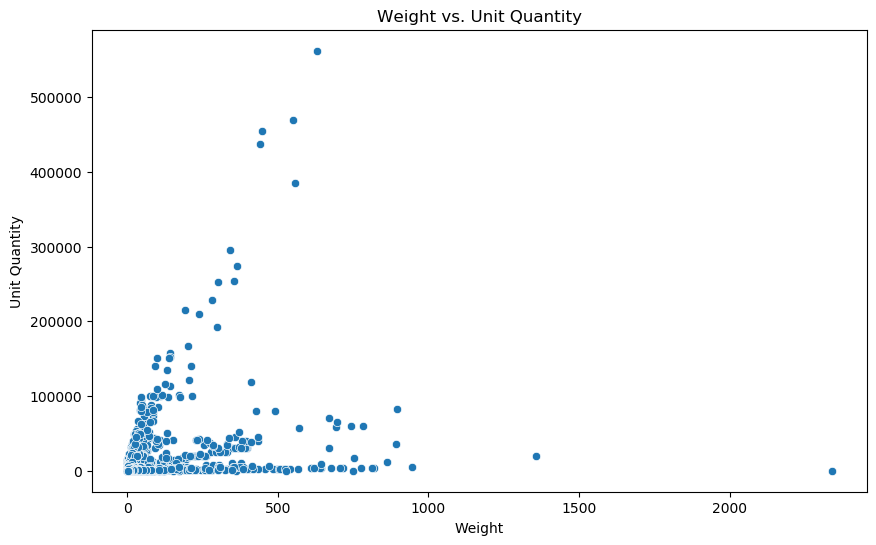

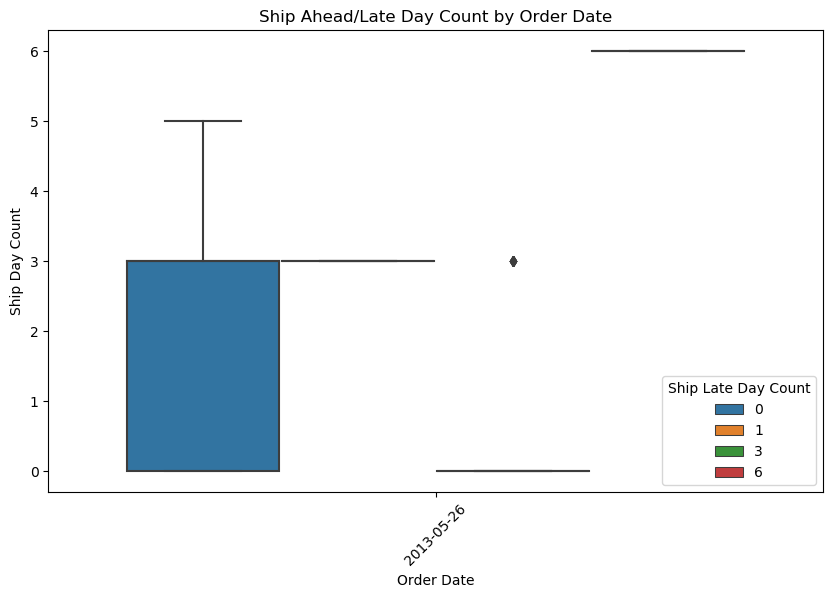

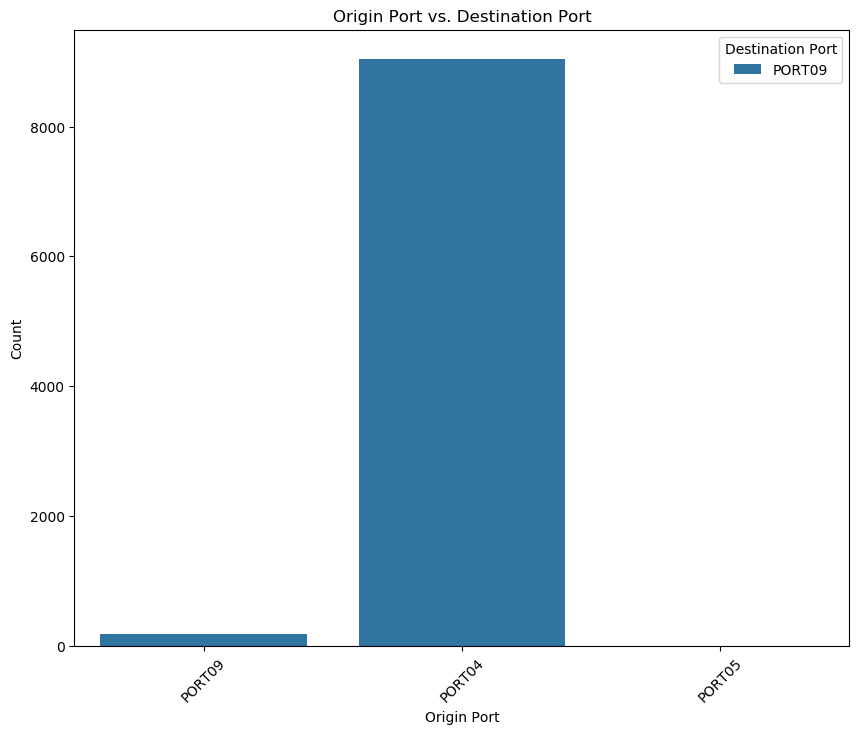

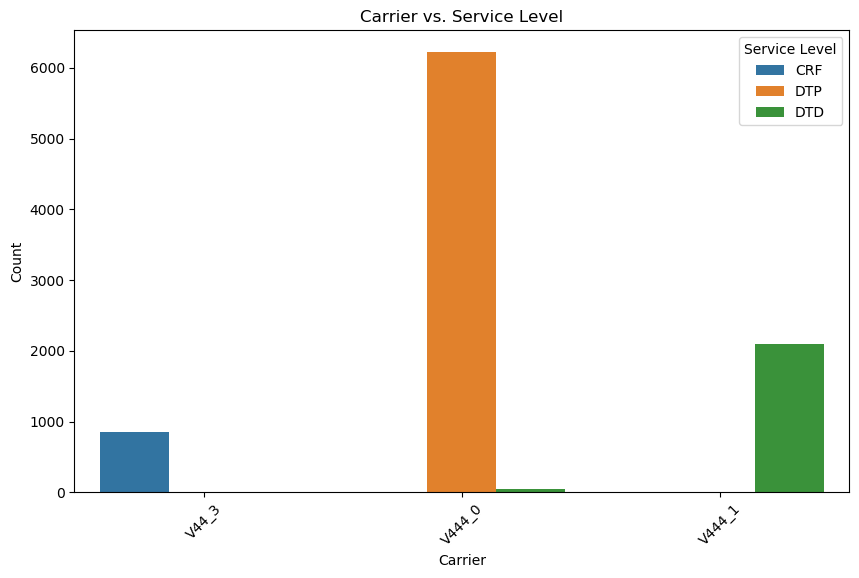

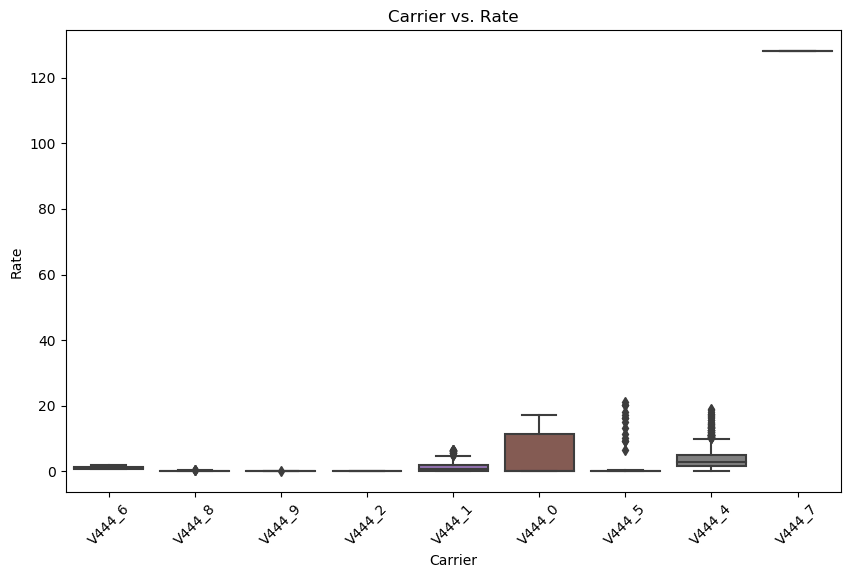

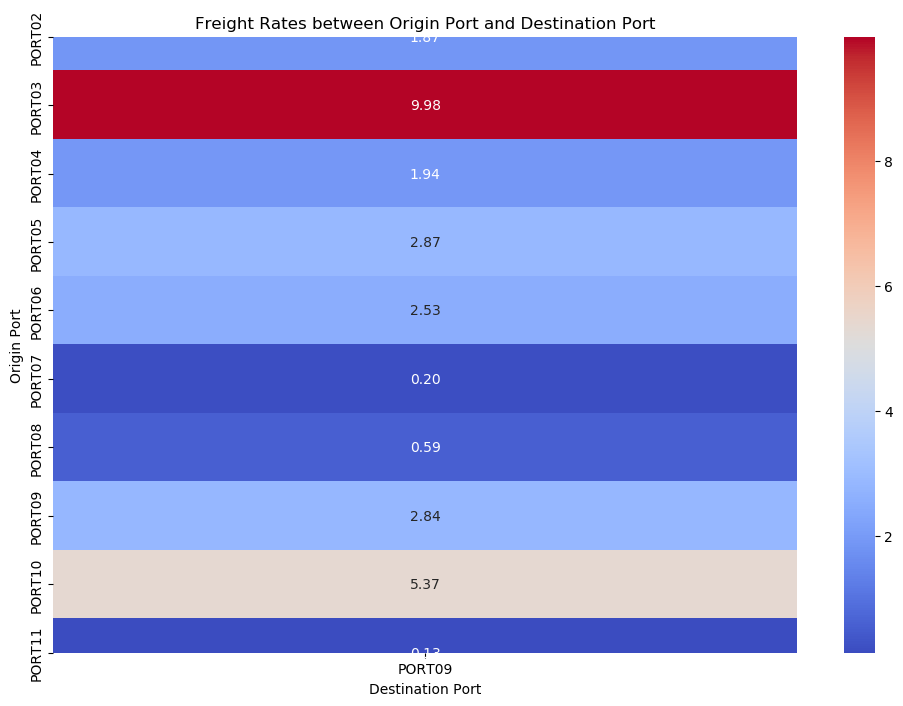

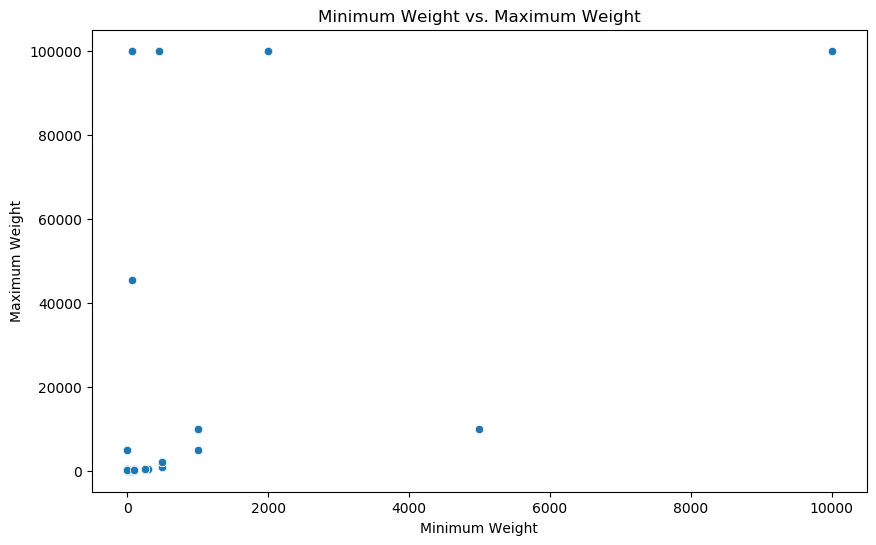

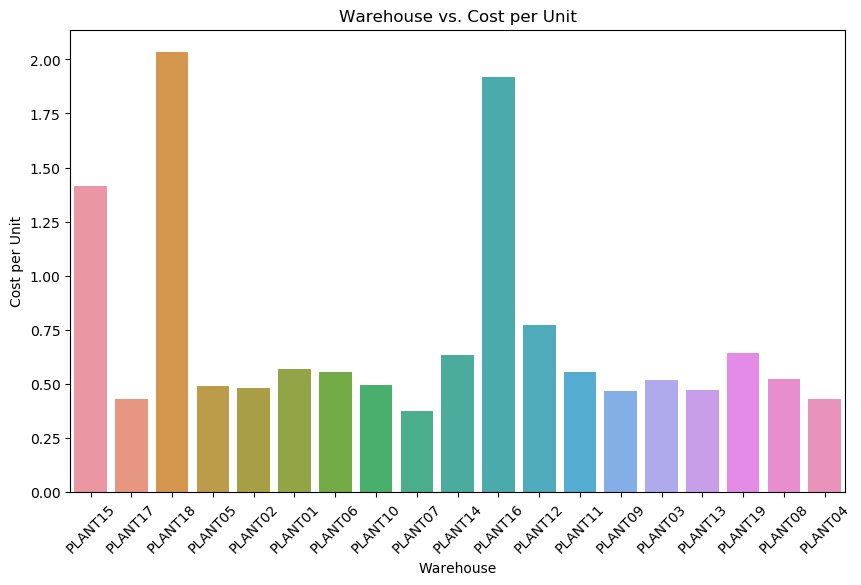

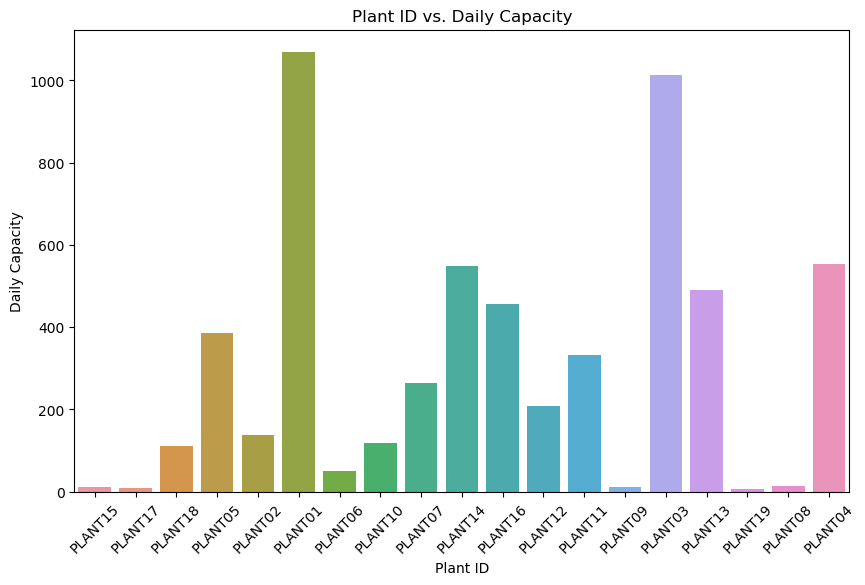

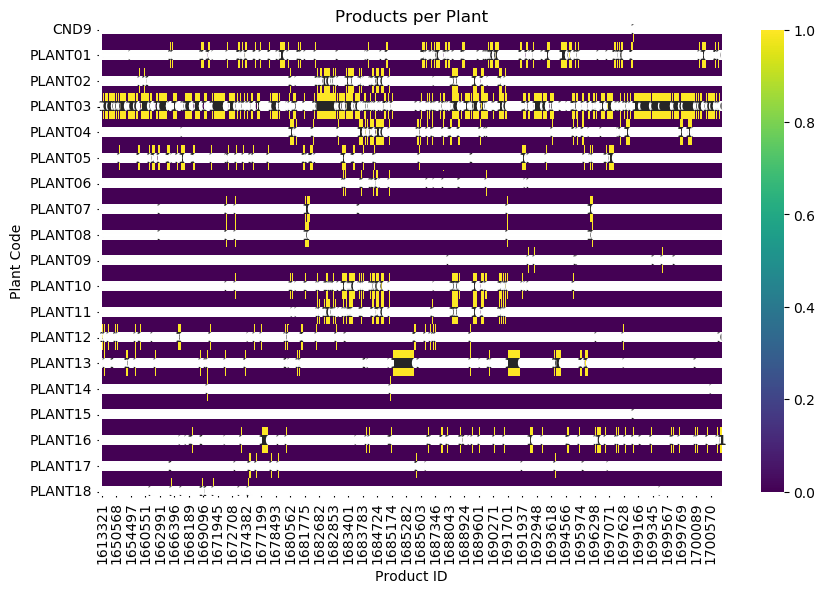

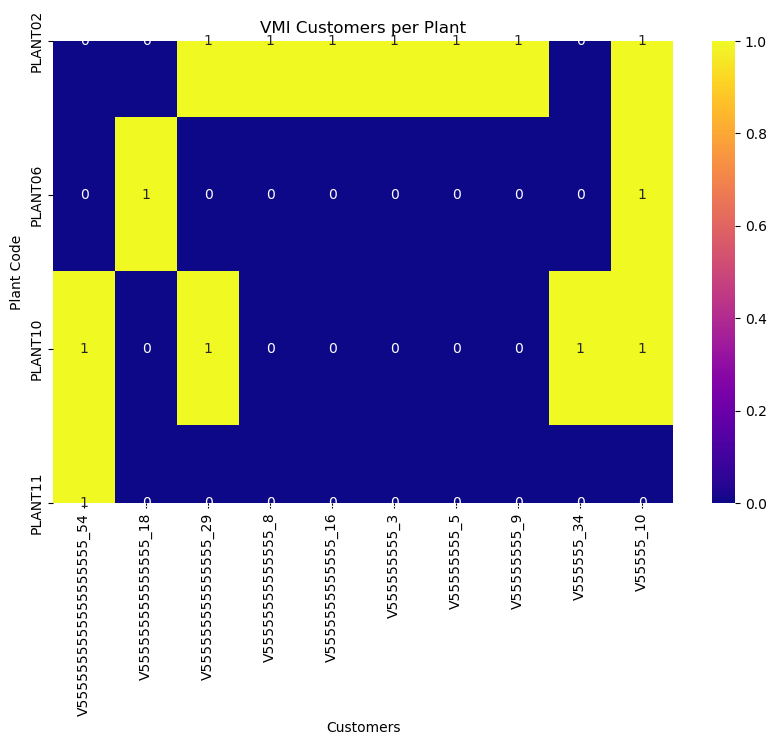

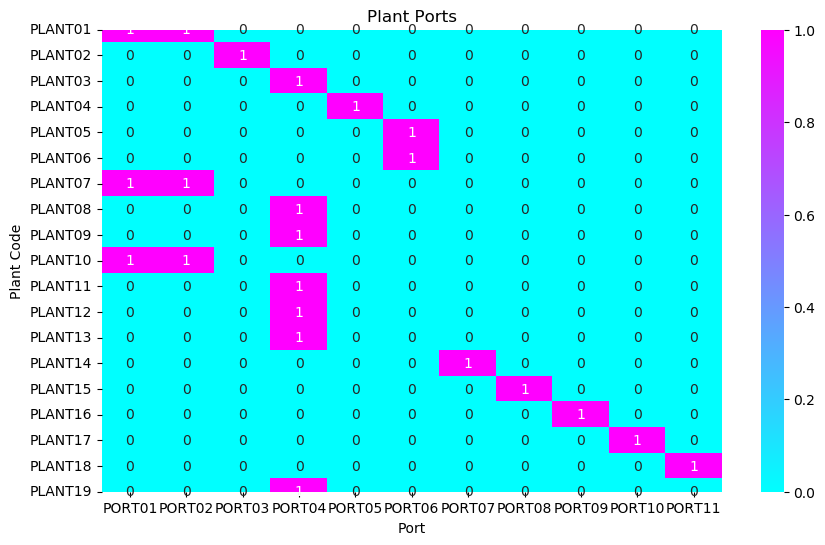

In [3]:
def order_list_weight_vs_unit_quantity(order_list):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=order_list, x='Weight', y='Unit quantity')
    plt.title('Weight vs. Unit Quantity')
    plt.xlabel('Weight')
    plt.ylabel('Unit Quantity')
    plt.show()

def order_list_date_vs_ship_day_count(order_list):
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=order_list, x='Order Date', y='Ship ahead day count', hue='Ship Late Day count')
    plt.title('Ship Ahead/Late Day Count by Order Date')
    plt.xlabel('Order Date')
    plt.ylabel('Ship Day Count')
    plt.xticks(rotation=45)
    plt.legend(title='Ship Late Day Count')
    plt.show()

def origin_port_vs_destination_port(order_list):
    # Assuming there's a common key like 'Plant Code' to join with plant_ports dataframe
    merged_data = order_list.merge(plant_ports, on='Plant Code', how='inner')
    plt.figure(figsize=(10, 8))
    sns.countplot(data=merged_data, x='Origin Port', hue='Destination Port')
    plt.title('Origin Port vs. Destination Port')
    plt.xlabel('Origin Port')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title='Destination Port')
    plt.show()

def carrier_vs_service_level(order_list):
    plt.figure(figsize=(10, 6))
    sns.countplot(data=order_list, x='Carrier', hue='Service Level')
    plt.title('Carrier vs. Service Level')
    plt.xlabel('Carrier')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title='Service Level')
    plt.show()

def freight_rates_carrier_vs_rate(freight_rates):
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=freight_rates, x='Carrier', y='rate')
    plt.title('Carrier vs. Rate')
    plt.xlabel('Carrier')
    plt.ylabel('Rate')
    plt.xticks(rotation=45)
    plt.show()

def origin_port_vs_destination_port_freight_rates(freight_rates):
    plt.figure(figsize=(12, 8))
    pivot_table = freight_rates.pivot_table(index='orig_port_cd', columns='dest_port_cd', values='rate', aggfunc='mean')
    sns.heatmap(data=pivot_table, cmap='coolwarm', annot=True, fmt=".2f")
    plt.title('Freight Rates between Origin Port and Destination Port')
    plt.xlabel('Destination Port')
    plt.ylabel('Origin Port')
    plt.show()

def min_weight_vs_max_weight(freight_rates):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=freight_rates, x='minm_wgh_qty', y='max_wgh_qty')
    plt.title('Minimum Weight vs. Maximum Weight')
    plt.xlabel('Minimum Weight')
    plt.ylabel('Maximum Weight')
    plt.show()

def warehouse_vs_cost_unit(wh_costs):
    plt.figure(figsize=(10, 6))
    sns.barplot(data=wh_costs, x='WH', y='Cost/unit')
    plt.title('Warehouse vs. Cost per Unit')
    plt.xlabel('Warehouse')
    plt.ylabel('Cost per Unit')
    plt.xticks(rotation=45)
    plt.show()

def plant_id_vs_daily_capacity(wh_capacities):
    plt.figure(figsize=(10, 6))
    sns.barplot(data=wh_capacities, x='Plant ID', y='Daily Capacity ')
    plt.title('Plant ID vs. Daily Capacity')
    plt.xlabel('Plant ID')
    plt.ylabel('Daily Capacity')
    plt.xticks(rotation=45)
    plt.show()

def plant_code_vs_product_id(products_per_plant):
    plt.figure(figsize=(10, 6))
    pivot_table = products_per_plant.pivot_table(index='Plant Code', columns='Product ID', aggfunc=len, fill_value=0)
    sns.heatmap(data=pivot_table, cmap='viridis', annot=True, fmt="g")
    plt.title('Products per Plant')
    plt.xlabel('Product ID')
    plt.ylabel('Plant Code')
    plt.show()

def plant_code_vs_customers(vmi_customers):
    plt.figure(figsize=(10, 6))
    pivot_table = vmi_customers.pivot_table(index='Plant Code', columns='Customers', aggfunc=len, fill_value=0)
    sns.heatmap(data=pivot_table, cmap='plasma', annot=True, fmt="g")
    plt.title('VMI Customers per Plant')
    plt.xlabel('Customers')
    plt.ylabel('Plant Code')
    plt.show()

def plant_code_vs_port(plant_ports):
    plt.figure(figsize=(10, 6))
    pivot_table = plant_ports.pivot_table(index='Plant Code', columns='Port', aggfunc=len, fill_value=0)
    sns.heatmap(data=pivot_table, cmap='cool', annot=True, fmt="g")
    plt.title('Plant Ports')
    plt.xlabel('Port')
    plt.ylabel('Plant Code')
    plt.show()

# Execute Analysis

order_list_weight_vs_unit_quantity(order_list)
order_list_date_vs_ship_day_count(order_list)
origin_port_vs_destination_port(order_list)
carrier_vs_service_level(order_list)

freight_rates_carrier_vs_rate(freight_rates)
origin_port_vs_destination_port_freight_rates(freight_rates)
min_weight_vs_max_weight(freight_rates)

warehouse_vs_cost_unit(wh_costs)
plant_id_vs_daily_capacity(wh_capacities)

plant_code_vs_product_id(products_per_plant)
plant_code_vs_customers(vmi_customers)
plant_code_vs_port(plant_ports)